<a href="https://colab.research.google.com/github/Coyote-Schmoyote/marketing-analysis-project/blob/main/marketing_analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4. Marketing analysis project

## 1. Problem Definition

#### Problem 1 
Calculate the basic statistics (number of records, maximum value, minimum value, standard deviation, etc.) for numerical data (age, balance, day, duration, campaign, pdays, previous).


#### Problem 2
Calculate the number of people who apply for a deposit and the number of people who do not apply for a deposit for each of the data types: job, marital, education, default, housing, and loan.

#### Problem 3 
Construct a forecasting model with y (apply for deposit or not apply for deposit) as the objective variable. Try several models (logistic regression, SVM, decision tree, k-NN, random forest, etc.). However, please remove the data in advance for testing (set the traln test splt parameter to random_state=11). Then validate each model. Display the percentage of correct answers, goodness of fit, recall, F1 score, and confusion matrix for each model on the test data. 
 
#### Problem 4
For the model you selected in question 3, draw the ROC curve and calculate the AUC so that you can compare.

## 2. Data 
The data is downloaded from https://archive.ics.uci.edu/ml/machine-learning-databases/00222/. 

The dataset was donated in 2012, and is based on direct marketing campaigns via phone calls of a Portuguese banking institution. The classification goal of the dataset is to predict whether the client will subscript a term deposit. The dataset includes 45,211 entries.

## 3. Features

The data consists of the following features (attributes):
1. Age 
2. Job 
3. Marital : marital status
4. Education 
5. Default: has credit in default? 
6. Housing: has housing loan? 
7. Loan: has personal loan? 
8. Contact: contact communication type
9. Month: last contact month of year
10. Day: last contact day of the week 
11. Duration: last contact duration, in seconds 
>Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
12. Campaign: number of contacts performed during this campaign and for this client
13. Pdays: number of days that passed by after the client was last contacted from a previous campaign 
>Note: 999 means client was not previously contacted
14. Previous: number of contacts performed before this campaign and for this client
15. Poutcome: outcome of the previous marketing campaign 
16. Y - has the client subscribed a term deposit?

## 4. Approach

First, we are going to conduct EDA (Exploratory Data Analysis) and descriptive statistics (Problem 1 and Problem 2). Second, we are going construct a classification model to predict whether the client will subscribe to the term deposit, based on the dataset features (Problem 3). Then, we are going to evaluate our models, and choose the best-perforoming one. For the best model, we are going to plot a ROC curve and AUC (Problem 4).







In [107]:
# Import the tools 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Import evaluation tools
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import auc, plot_roc_curve

## 1. EDA 

Exploratory data analysis is often the first step in a data science project. Also sometimes referred to as "descriptive statistics," the aim of EDA is to familiarize yourself with the data, organize and summarize it, check data for errors or problems, and visualize some of the variables. In other words, EDA always consists of:
* visual displays
* numerical measures

In [92]:
# import data
data = pd.read_csv("drive/MyDrive/ml-projects/marketing-analysis/data/bank-full.csv", sep=";") # "sep" tells how the data items are separated in a CSV file

In [60]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [61]:
# check dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [62]:
# check for missing values
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [63]:
# see the column names
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [64]:
# check for duplicated data
data.duplicated().sum()

0

In [65]:
# check for unique values for each variable
data.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

### Data visualization

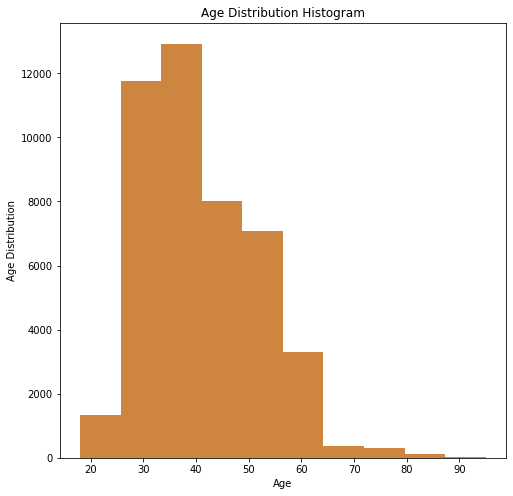

In [66]:
# Plot age distribution
plt.figure(figsize=(8,8))
plt.hist(data.age, color="peru")
plt.xlabel("Age")
plt.ylabel("Age Distribution")
plt.title("Age Distribution Histogram")
plt.show();

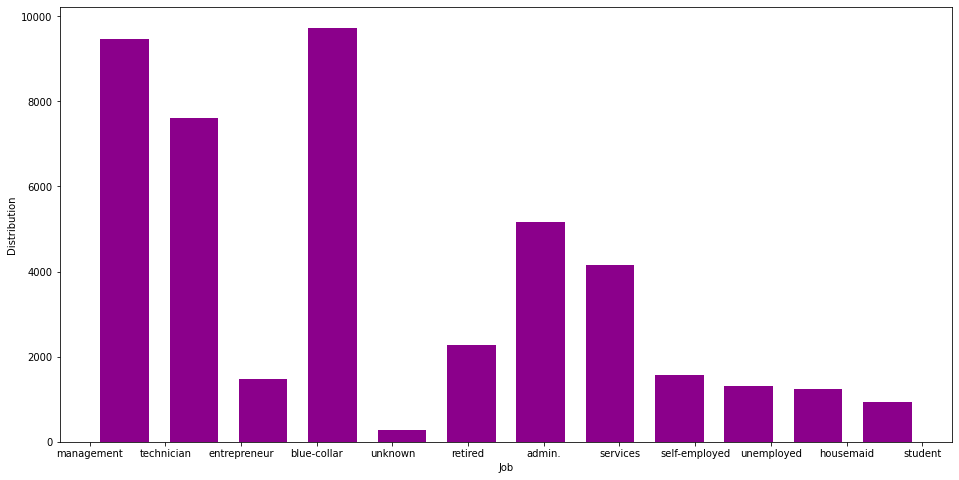

In [67]:
# plot job distribution
plt.figure(figsize=(16,8))
plt.hist(data.job, rwidth=0.7, bins=12, color="darkmagenta")
plt.xlabel("Job")
plt.ylabel("Distribution")
plt.show();

Text(0.5, 1.0, 'Education distribution')

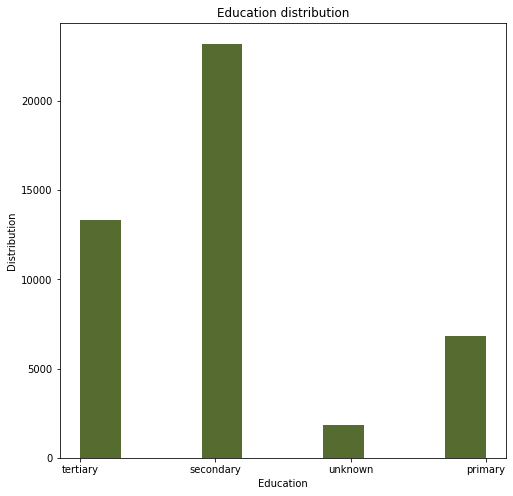

In [68]:
#plot education distribution 
plt.figure(figsize=(8, 8))
plt.hist(data.education, color="darkolivegreen")
plt.xlabel("Education")
plt.ylabel("Distribution")
plt.title("Education distribution")

In [69]:
# plot data correlation
data.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


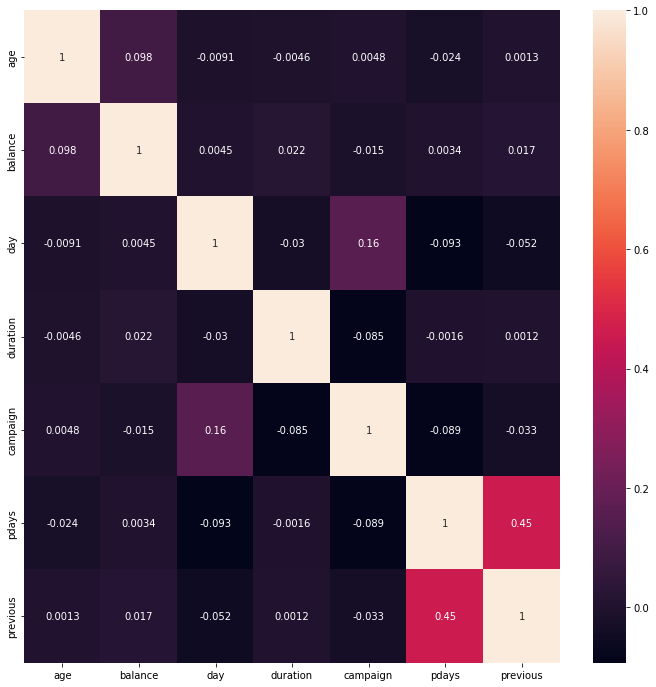

In [70]:
# heatmap 
corr = data.corr()
plt.subplots(figsize=(12,12))
sns.heatmap(corr, cmap="rocket", annot=True);

### Descriptive statistics
Descriptive statistics is a part of EDA. In descriptive statistics, we calculate and summarize the dataset to describe the data. When numerically describing data, we have to be aware of the following 3 characteristics:
1. Central tendency of data
> It describes the center of the distribution of data. In other words, central tendency summary aims to describe the whole set of data with a single average value. Some of the most widely measures of the center of the data are:
 * Mean 
 * Median
 * Mode
 * Midrange
2. Dispersion of data
> Dispersion is the spread of the data. It measures how far or close the data points are from each other, and helps to understand the variation of data. Some of the ways to measure dispersion are:
 * Range 
 * Standard deviation
 * Variance
 
 <img src="https://i0.wp.com/makemeanalyst.com/wp-content/uploads/2017/05/Symetric-Left-and-right-skew.png" align="right" width="200">
3. Shape of the data 
> Measures of shape describe the pattern of the data within the datset. Three possible shapes are:
 * Symmetric
 * Skewed left
 * Skewed right

#### Problem 1 
Calculate the basic statistics (number of records, maximum value, minimum value, standard deviation, etc.) for numerical data (age, balance, day, duration, campaign, pdays, previous).



In [71]:
data.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


age           40.936210
balance     1362.272058
day           15.806419
duration     258.163080
campaign       2.763841
pdays         40.197828
previous       0.580323
dtype: float64

In [72]:
print(f"Avg. age: {int(np.mean(data.age))} years old")
print(f"Avg. balance: {int(np.mean(data.balance))} eur")
print(f"Avg. day: {int(np.mean(data.day))}")
print(f"Avg. duraiton: {int(np.mean(data.duration))/60} min")
print(f"Avg. nr. of contacts with the client for the campaign: {int(np.mean(data.campaign))}")
print(f"Avg. time of last contact: {int(np.mean(data.pdays))} days ago")
print(f"Avg. nr. of contacts before the campaign: {int(np.mean(data.previous))}")

Avg. age: 40 years old
Avg. balance: 1362 eur
Avg. day: 15
Avg. duraiton: 4.3 min
Avg. nr. of contacts with the client for the campaign: 2
Avg. time of last contact: 40 days ago
Avg. nr. of contacts before the campaign: 0


In [73]:
print(f"Min. age: {int(np.min(data.age))} years old")
print(f"Min. balance: {int(np.min(data.balance))} eur")
print(f"Min. day: {int(np.min(data.day))}")
print(f"Min. duraiton: {int(np.min(data.duration))/60} min")
print(f"Min. nr. of contacts with the client for the campaign: {int(np.min(data.campaign))}")
print(f"Min. time of last contact: {int(np.min(data.pdays))} days")
print(f"Min. nr. of contacts before the campaign: {int(np.min(data.previous))}")

Min. age: 18 years old
Min. balance: -8019 eur
Min. day: 1
Min. duraiton: 0.0 min
Min. nr. of contacts with the client for the campaign: 1
Min. time of last contact: -1 days
Min. nr. of contacts before the campaign: 0


In [74]:
print(f"Max. age: {int(np.max(data.age))} years old")
print(f"Max. balance: {int(np.max(data.balance))} eur")
print(f"Max. day: {int(np.max(data.day))}")
print(f"Max. duraiton: {int((np.max(data.duration))/60)} min")
print(f"Max. nr. of contacts with the client for the campaign: {int(np.max(data.campaign))}")
print(f"Max. time of last contact: {int(np.max(data.pdays))} days")
print(f"Max. nr. of contacts before the campaign: {int(np.max(data.previous))}")

Max. age: 95 years old
Max. balance: 102127 eur
Max. day: 31
Max. duraiton: 81 min
Max. nr. of contacts with the client for the campaign: 63
Max. time of last contact: 871 days
Max. nr. of contacts before the campaign: 275


In [75]:
# standard deviation 
print("Standard deviation")
print(f"Age: {int(np.std(data.age))}")
print(f"Balance: {int(np.std(data.balance))}")
print(f"Day: {int(np.std(data.day))}")
print(f"Call duration: {int(np.std(data.duration))}")
print(f"Contacts: {int(np.std(data.campaign))}")
print(f"Last contact: {int(np.std(data.pdays))}")
print(f"Previous contacts: {int(np.std(data.previous))}")

Standard deviation
Age: 10
Balance: 3044
Day: 8
Call duration: 257
Contacts: 3
Last contact: 100
Previous contacts: 2


In [76]:
#check variance
data.var()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


age         1.127581e+02
balance     9.270599e+06
day         6.926361e+01
duration    6.632057e+04
campaign    9.597733e+00
pdays       1.002577e+04
previous    5.305841e+00
dtype: float64

#### Problem 2
Calculate the number of people who apply for a deposit and the number of people who do not apply for a deposit for each of the data types: job, marital, education, default, housing, and loan.

### Data manipulation

Now it‘s time to prepare our data for machine learning. Similarly to what we did in our previous projects, we need to make sure that all our data is numerical, so that the machine learning model can parse it.

Before we do that, however, let‘s get back to the vey beginning of our notebook to the **3. Features** section. Under the attribute *duration* we had the following note:

>This attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Therefore, before we proceed with converting object data into cateogires, and then categories into numbers, we need to get rid of this column first.

In [93]:
data = data.drop(["duration"], axis=1)

In [78]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign', 'pdays', 'previous',
       'poutcome', 'y'],
      dtype='object')

# Turn obj → cat, and cat → num

Before we convert all our data into numbers, we should first turn some of the data into a `categories` datatype. The categorical data type is useful in the following cases:
* When a string variable consists of only  a few different values, as it will save some memory.
* When the lexical order of a variable is not the same as the logical order ("three", "one", "two").
* When you need other libraries to treat the data as a categorical varibale, for example, for suitable statistical methods, or certain plot types.


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  campaign   45211 non-null  int64 
 12  pdays      45211 non-null  int64 
 13  previous   45211 non-null  int64 
 14  poutcome   45211 non-null  object
 15  y          45211 non-null  object
dtypes: int64(6), object(10)
memory usage: 5.5+ MB


In [80]:
obj_cols = []

for column in data.columns:
  if(data[column].dtype == object):
    obj_cols.append(column)

In [81]:
obj_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [82]:
#turn to categories
data[obj_cols] = data[obj_cols].astype("category")

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  campaign   45211 non-null  int64   
 12  pdays      45211 non-null  int64   
 13  previous   45211 non-null  int64   
 14  poutcome   45211 non-null  category
 15  y          45211 non-null  category
dtypes: category(10), int64(6)
memory usage: 2.5 MB


In [101]:
"""
!!!COME BACK TO THIS AND FIND A BETTER WAY!!!
"""
#import encoder
from sklearn.preprocessing import LabelEncoder

#instantiate the encoder
encoder = LabelEncoder()

#transform data
data.y = encoder.fit_transform(data.y)
data.job = encoder.fit_transform(data.job)
data.marital = encoder.fit_transform(data.marital)
data.education = encoder.fit_transform(data.education)
data.default = encoder.fit_transform(data.default)
data.housing = encoder.fit_transform(data.housing)
data.loan = encoder.fit_transform(data.loan)
data.contact = encoder.fit_transform(data.contact)
data.month = encoder.fit_transform(data.month)
data.poutcome = encoder.fit_transform(data.poutcome)


In [102]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,4,-1,0,3,0


In [104]:
# split data
X = data.drop("y", axis=1)
y = data["y"]

# split the data using Scikit-Learn‘s train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=11)

In [105]:
# Standardize data
from sklearn.preprocessing import StandardScaler

#instantiate Standard Scaler
sc = StandardScaler()

#fit on train data
sc.fit(X_train)

#transform and store scailed train and test data in new variables
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#### Problem 3
This problem consists of 4 sub-tasks:
1. Construct a forecasting model with y (apply for deposit or not apply for deposit) as the objective variable. 
2. Try several models (logistic regression, SVM, decision tree, k-NN, random forest, etc.). However, please remove the data in advance for testing (set the traln test splt parameter to random_state=11). 
3. Then validate each model. 
4. Display the percentage of correct answers, goodness of fit, recall, F1 score, and confusion matrix for each model on the test data.

This workflow should look quite familiar by now. We already tried implementing different classification models and scoring them in our `breast cancer` project. 
> Breast cancer project: https://colab.research.google.com/drive/1fUQO1zeb8VZ2Cn0dJTXOxhgyjtR6UX1H

However, there is one new requirement. This problem asks us to "validate" each model. What does that mean?


### Validation set
Often, the term "validation set" is used interchangeably with the term "test set." Both validation and test sets are kept separately from the train sets, and both are used to evaluate the model. So what is the difference? Let‘s take a look at the definitions.
* `training set` is a set of examples used for learning to fit the parameters of the model.
* `validaiton set` is a set of examples used to tune the parameters of a model.
* `test set` is a set of examples used *only* to assess the performance of the model.

<img src="https://i.stack.imgur.com/pXAfX.png" align="center" width=500>

We already split our data into train and test sets in the previous cell, using `scikit-learn`‘s `train_test_split` module. We assigned `test_size` the value of 0.2, which stands for 20% of data. It means, that our training data currently consists of 80% of the original dataset. We create a validation set by further splitting training data using the same `train_test_split` module. Common ratios of data distribution between the train/validation/test are:
* 70/15/15
* 80/10/10
* 60/20/20

Now let‘s split out train data into train and validation sets.


In [126]:
# Create validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                  y_train,
                                                  test_size = 0.2,
                                                  random_state=11)

In [127]:
# Create a ddictionary of models
models = {"Logistic regression": LogisticRegression(),
          "Decision Tree": DecisionTreeClassifier(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Function to train and score models
def train_score(models, X_train, X_test, y_train, y_test):
  # Set random seed
  np.random.seed(11)
  # Make an empty dictionary for the scores
  scores = {}
  # Loop through models
  for name, model in models.items():
    #Fit the model to the data
    model.fit(X_train, y_train)
    #Evalute the model and append to the dict
    scores[name] = model.score(X_test, y_test)
  return scores

In [124]:
scores = train_score(models=models,
                     X_train = X_train,
                     X_test = X_test,
                     y_train = y_train,
                     y_test = y_test)
scores

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


{'Decision Tree': 0.8290390357182351,
 'KNN': 0.8782483689041247,
 'Logistic regression': 0.8826716797522945,
 'Random Forest': 0.8939511224151278}

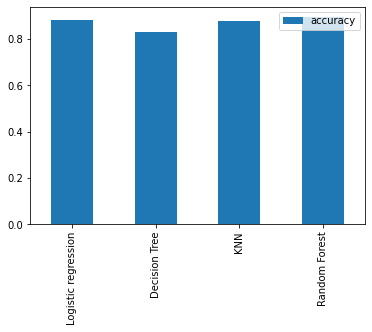

In [125]:
# Model comparisoon
model_compare = pd.DataFrame(scores, index=["accuracy"])
model_compare.T.plot.bar();

### Observations

### Hyperparameter tuning